In [1]:
# Mod 12 CS I

In [2]:
import numpy as np
import pylab as plt
import networkx as nx

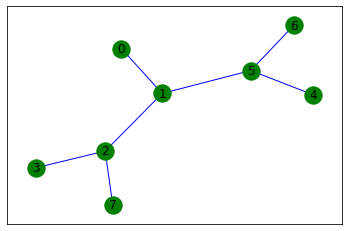

In [3]:
# Initializing points
points_list = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]
goal = 7
mapping = {0: 'Start', 1: '1', 2: '2', 3: '3',
           4: '4', 5: '5', 6: '6', 7: '7-Destination'}
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G, k=.5, center=points_list[2])
nx.draw_networkx_nodes(G, pos, node_color='g')
nx.draw_networkx_edges(G, pos, edge_color='b')
nx.draw_networkx_labels(G, pos)
plt.show()

In [4]:
NO_OF_POINTS = 8

# Inititlaizing R Matrix
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1

for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        # reverse of point
        R[point[::-1]] = 0

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [5]:
R[goal, goal] = 150
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 150.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.]])

In [6]:
Q = np.matrix(np.zeros([NO_OF_POINTS, NO_OF_POINTS]))

# The learning parameter
gamma = 0.8

initial_state = 1

In [7]:
def available_actions(state):
    current_state_row = R[state, ]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [8]:
available_act = available_actions(initial_state)
available_act

array([0, 2, 5])

In [9]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

In [10]:
action = sample_next_action(available_act)
action

2

In [11]:
def update(current_state, action, gamma):
    max_index = (np.where(Q[action, ] == np.max(Q[action, ]))[1])
    if (max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

In [12]:
update(initial_state, action, gamma)

max_value 0.0


0

In [13]:
scores = []

for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print('Score:', str(score))

    print("Trained Q matrix:")
    print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q m

Trained Q matrix:
[[  0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.          80.           0.           0.
   36.3183391    0.           0.        ]
 [  0.           0.           0.          45.39792388   0.
    0.           0.         100.        ]
 [  0.           0.          56.74740484   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   36.3183391    0.           0.        ]
 [  0.          45.39792388   0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   36.3183391    0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.          70.93425606]]
max_value 125.95200000000003
Score: 587.4325259515572
Trained Q matrix:
[[  0.           0.           0.           0.           0.
    0.           0.           0.        ]


max_value 406.43942400000003
Score: 770.4467541394047
Trained Q matrix:
[[  0.          58.43431022   0.           0.           0.
    0.           0.           0.        ]
 [ 46.74744818   0.          73.04288777   0.           0.
   31.91031986   0.           0.        ]
 [  0.          58.43431022   0.          58.43431022   0.
    0.           0.          91.30360972]
 [  0.           0.          73.04288777   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   31.91031986   0.           0.        ]
 [  0.          39.88789982   0.           0.           0.
    0.          25.52825588   0.        ]
 [  0.           0.           0.           0.           0.
   31.91031986   0.           0.        ]
 [  0.           0.          49.85987477   0.           0.
    0.           0.         100.        ]]
max_value 325.15153920000006
Score: 770.4467541394047
Trained Q matrix:
[[  0.          58.43431022   0.           0.  

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Score: 819.1580230231854
Trained Q matrix:
[[  0.          58.43431022   0.           0.           0.
    0.           0.           0.        ]
 [ 46.74744818   0.          73.04288777   0.           0.
   31.91031986   0.           0.        ]
 [  0.          58.43431022   0.          58.43431022   0.
    0.           0.          91.30360972]
 [  0.           0.          73.04288777   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   31.91031986   0.           0.        ]
 [  0.          39.88789982   0.           0.          25.52825588
    0.          25.52825588   0.        ]
 [  0.           0.           0.           0.           0.
   31.91031986   0.           0.        ]
 [  0.           0.          73.04288777   0.           0.
    0.           0.         100.        ]]
max_value 177.5616
Score: 819.1580230231854
Trained Q matrix:
[[  0.          58.43431022   0.           0.           0.
    0.           0.

max_value 177.5616
Score: 792.5302760369652
Trained Q matrix:
[[  0.          62.10871429   0.           0.           0.
    0.           0.           0.        ]
 [ 49.68697143   0.          77.63589286   0.           0.
   26.47337764   0.           0.        ]
 [  0.          48.47815906   0.          62.10871429   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   26.47337764   0.           0.        ]
 [  0.          33.09172205   0.           0.          21.17870211
    0.          21.17870211   0.        ]
 [  0.           0.           0.           0.           0.
   26.47337764   0.           0.        ]
 [  0.           0.          60.59769883   0.           0.
    0.           0.          97.04486608]]
max_value 177.5616
Score: 792.5302760369652
Trained Q matrix:
[[  0.          62.10871429   0.           0.           0.


Score: 915.3077597229998
Trained Q matrix:
[[  0.          59.57362261   0.           0.           0.
    0.           0.           0.        ]
 [ 47.65889809   0.          74.46702826   0.           0.
   47.65889809   0.           0.        ]
 [  0.          59.57362261   0.          59.57362261   0.
    0.           0.          98.18591091]
 [  0.           0.          76.73463963   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   47.65889809   0.           0.        ]
 [  0.          59.57362261   0.           0.          20.31425093
    0.          38.12711847   0.        ]
 [  0.           0.           0.           0.           0.
   47.65889809   0.           0.        ]
 [  0.           0.          78.54872872   0.           0.
    0.           0.         100.        ]]
max_value 266.60740509204487
Score: 933.1206272622201
Trained Q matrix:
[[  0.          59.57362261   0.           0.           0.
    0.   

max_value 439.4074050920449
Score: 921.6169723857456
Trained Q matrix:
[[  0.          61.23923755   0.           0.           0.
    0.           0.           0.        ]
 [ 48.99139004   0.          76.54904693   0.           0.
   46.44560499   0.           0.        ]
 [  0.          58.05700623   0.          58.05700623   0.
    0.           0.          95.68630866]
 [  0.           0.          74.78114065   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   46.44560499   0.           0.        ]
 [  0.          58.05700623   0.           0.          37.15648399
    0.          37.15648399   0.        ]
 [  0.           0.           0.           0.           0.
   46.44560499   0.           0.        ]
 [  0.           0.          76.54904693   0.           0.
    0.           0.         100.        ]]
max_value 549.2592563650561
Score: 921.6169723857456
Trained Q matrix:
[[  0.          61.23923755   0.         

Trained Q matrix:
[[  0.          59.91592838   0.           0.           0.
    0.           0.           0.        ]
 [ 47.9327427    0.          74.89491048   0.           0.
   47.9327427    0.           0.        ]
 [  0.          59.91592838   0.          59.91592838   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   47.9327427    0.           0.        ]
 [  0.          59.91592838   0.           0.          38.34619416
    0.          38.34619416   0.        ]
 [  0.           0.           0.           0.           0.
   47.9327427    0.           0.        ]
 [  0.           0.          74.89491048   0.           0.
    0.           0.          99.43321063]]
max_value 439.4074050920449
Score: 937.3101042592574
Trained Q matrix:
[[  0.          59.91592838   0.           0.           0.
    0.           0.           0.   

Score: 957.3847440430643
Trained Q matrix:
[[  0.          63.48187573   0.           0.           0.
    0.           0.           0.        ]
 [ 47.544694     0.          79.35234466   0.           0.
   47.544694     0.           0.        ]
 [  0.          63.48187573   0.          59.4308675    0.
    0.           0.          99.19043083]
 [  0.           0.          79.35234466   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   50.78550058   0.           0.        ]
 [  0.          63.48187573   0.           0.          38.0357552
    0.          40.62840047   0.        ]
 [  0.           0.           0.           0.           0.
   50.78550058   0.           0.        ]
 [  0.           0.          74.28858437   0.           0.
    0.           0.         100.        ]]
max_value 586.6986185005613
Score: 962.4485043357715
Trained Q matrix:
[[  0.          63.48187573   0.           0.           0.
    0.     

Score: 976.4398727852449
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 50.80782514   0.          80.           0.           0.
   50.80782514   0.           0.        ]
 [  0.          63.50978142   0.          64.           0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   50.80782514   0.           0.        ]
 [  0.          63.50978142   0.           0.          37.63607979
    0.          40.64626011   0.        ]
 [  0.           0.           0.           0.           0.
   50.80782514   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.          99.90666948]]
max_value 478.2147187958842
Score: 976.4398727852449
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.    

[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 50.80782514   0.          80.           0.           0.
   50.80782514   0.           0.        ]
 [  0.          63.50978142   0.          64.           0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   50.80782514   0.           0.        ]
 [  0.          63.50978142   0.           0.          37.63607979
    0.          40.64626011   0.        ]
 [  0.           0.           0.           0.           0.
   50.80782514   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.         100.        ]]
max_value 478.2147187958842
Score: 976.5332033088541
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 50.80782

    0.           0.         100.        ]]
max_value 748.5717750367074
Score: 978.4332621068495
Trained Q matrix:
[[  0.          63.88361607   0.           0.           0.
    0.           0.           0.        ]
 [ 50.71543117   0.          79.85452009   0.           0.
   50.71543117   0.           0.        ]
 [  0.          63.88361607   0.          63.88361607   0.
    0.           0.          99.81815011]
 [  0.           0.          79.85452009   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   50.71543117   0.           0.        ]
 [  0.          63.39428896   0.           0.          40.57234493
    0.          40.57234493   0.        ]
 [  0.           0.           0.           0.           0.
   50.71543117   0.           0.        ]
 [  0.           0.          79.85452009   0.           0.
    0.           0.         100.        ]]
max_value 379.64140331026397
Score: 978.4332621068495
Trained Q matri

max_value 599.2687488187943
Score: 980.7150393608165
Trained Q matrix:
[[  0.          63.82419119   0.           0.           0.
    0.           0.           0.        ]
 [ 50.6682554    0.          79.78023899   0.           0.
   51.05935295   0.           0.        ]
 [  0.          63.82419119   0.          63.98438475   0.
    0.           0.          99.97560117]
 [  0.           0.          79.98048094   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.05935295   0.           0.        ]
 [  0.          63.82419119   0.           0.          40.84748236
    0.          40.84748236   0.        ]
 [  0.           0.           0.           0.           0.
   51.05935295   0.           0.        ]
 [  0.           0.          79.98048094   0.           0.
    0.           0.         100.        ]]
max_value 382.5717750367074
Score: 980.7150393608165
Trained Q matrix:
[[  0.          63.82419119   0.         

Score: 980.9035307519944
Trained Q matrix:
[[  0.          63.97189804   0.           0.           0.
    0.           0.           0.        ]
 [ 50.65836737   0.          79.96487254   0.           0.
   51.04938859   0.           0.        ]
 [  0.          63.81173574   0.          63.97189804   0.
    0.           0.          99.95609068]
 [  0.           0.          79.96487254   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.04938859   0.           0.        ]
 [  0.          63.81173574   0.           0.          40.83951087
    0.          40.83951087   0.        ]
 [  0.           0.           0.           0.           0.
   51.04938859   0.           0.        ]
 [  0.           0.          79.96487254   0.           0.
    0.           0.         100.        ]]
max_value 382.5717750367074
Score: 980.9035307519944
Trained Q matrix:
[[  0.          63.97189804   0.           0.           0.
    0.    

Score: 981.4452310931654
Trained Q matrix:
[[  0.          63.96191217   0.           0.           0.
    0.           0.           0.        ]
 [ 51.16952974   0.          79.95239021   0.           0.
   51.0414199    0.           0.        ]
 [  0.          63.96191217   0.          63.96191217   0.
    0.           0.          99.94048777]
 [  0.           0.          79.95239021   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.0414199    0.           0.        ]
 [  0.          63.80177488   0.           0.          40.83313592
    0.          40.83313592   0.        ]
 [  0.           0.           0.           0.           0.
   51.0414199    0.           0.        ]
 [  0.           0.          79.95239021   0.           0.
    0.           0.         100.        ]]
max_value 382.5717750367074
Score: 981.4452310931654
Trained Q matrix:
[[  0.          63.96191217   0.           0.           0.
    0.    

Score: 981.7290176340534
Trained Q matrix:
[[  0.          63.93834193   0.           0.           0.
    0.           0.           0.        ]
 [ 51.15067354   0.          79.92292741   0.           0.
   51.02261092   0.           0.        ]
 [  0.          63.93834193   0.          63.93834193   0.
    0.           0.         100.        ]
 [  0.           0.          79.92292741   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.15067354   0.           0.        ]
 [  0.          63.93834193   0.           0.          40.81808873
    0.          40.92053883   0.        ]
 [  0.           0.           0.           0.           0.
   51.15067354   0.           0.        ]
 [  0.           0.          79.92292741   0.           0.
    0.           0.          99.9936086 ]]
max_value 479.4149990550354
Score: 981.7290176340534
Trained Q matrix:
[[  0.          63.93834193   0.           0.           0.
    0.    

max_value 479.8773164098267
Score: 982.1368170500037
Trained Q matrix:
[[  0.          63.99411022   0.           0.           0.
    0.           0.           0.        ]
 [ 51.14596626   0.          79.99263778   0.           0.
   51.14596626   0.           0.        ]
 [  0.          63.93245783   0.          63.99411022   0.
    0.           0.          99.99079723]
 [  0.           0.          79.99263778   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.14596626   0.           0.        ]
 [  0.          63.93245783   0.           0.          40.81433234
    0.          40.91677301   0.        ]
 [  0.           0.           0.           0.           0.
   51.14596626   0.           0.        ]
 [  0.           0.          79.99263778   0.           0.
    0.           0.         100.        ]]
max_value 599.8466455122833
Score: 982.1368170500037
Trained Q matrix:
[[  0.          63.99411022   0.         

[[  0.          63.99034134   0.           0.           0.
    0.           0.           0.        ]
 [ 51.14295405   0.          79.99790598   0.           0.
   51.19865983   0.           0.        ]
 [  0.          63.99034134   0.          63.99832478   0.
    0.           0.         100.        ]
 [  0.           0.          79.99790598   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.14295405   0.           0.        ]
 [  0.          63.99832478   0.           0.          40.8119286
    0.          40.91436324   0.        ]
 [  0.           0.           0.           0.           0.
   51.19865983   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.          99.99738248]]
max_value 479.9371860018313
Score: 982.3880297421629
Trained Q matrix:
[[  0.          63.99832478   0.           0.           0.
    0.           0.           0.        ]
 [ 51.142954

Score: 982.5163226195006
Trained Q matrix:
[[  0.          63.99790733   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19505608   0.          79.99738417   0.           0.
   51.19505608   0.           0.        ]
 [  0.          63.99549519   0.          63.99790733   0.
    0.           0.          99.99673021]
 [  0.           0.          79.99738417   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19505608   0.           0.        ]
 [  0.          63.9938201    0.           0.          40.80905595
    0.          40.95604486   0.        ]
 [  0.           0.           0.           0.           0.
   51.19505608   0.           0.        ]
 [  0.           0.          79.99436899   0.           0.
    0.           0.         100.        ]]
max_value 479.96783923293765
Score: 982.5163226195006
Trained Q matrix:
[[  0.          63.99790733   0.           0.           0.
    0.   

[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 51.19470482   0.          80.           0.           0.
   51.19470482   0.           0.        ]
 [  0.          64.           0.          63.99746823   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19470482   0.           0.        ]
 [  0.          63.99338103   0.           0.          40.80877595
    0.          40.95576386   0.        ]
 [  0.           0.           0.           0.           0.
   51.19470482   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.         100.        ]]
max_value 479.98682694981136
Score: 982.5342083513464
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 51.1947

max_value 307.1597990411721
Score: 982.6865262922099
Trained Q matrix:
[[  0.          63.99896301   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19387531   0.          79.99870376   0.           0.
   51.19387531   0.           0.        ]
 [  0.          63.99896301   0.          63.99643128   0.
    0.           0.          99.99971897]
 [  0.           0.          79.99977518   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19387531   0.           0.        ]
 [  0.          63.99896301   0.           0.          40.95510025
    0.          40.95933632   0.        ]
 [  0.           0.           0.           0.           0.
   51.1991704    0.           0.        ]
 [  0.           0.          79.99977518   0.           0.
    0.           0.         100.        ]]
max_value 479.98682694981136
Score: 982.6865262922099
Trained Q matrix:
[[  0.          63.99896301   0.        

Score: 982.7087862069326
Trained Q matrix:
[[  0.          63.99881912   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19376022   0.          80.           0.           0.
   51.199741     0.           0.        ]
 [  0.          63.99881912   0.          63.99967626   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.199741     0.           0.        ]
 [  0.          63.99967626   0.           0.          40.9597928
    0.          40.95924424   0.        ]
 [  0.           0.           0.           0.           0.
   51.199741     0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.          99.99977518]]
max_value 749.9932553983034
Score: 982.7087862069326
Trained Q matrix:
[[  0.          63.99881912   0.           0.           0.
    0.     

Score: 982.7099670848991
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 51.19376022   0.          80.           0.           0.
   51.199741     0.           0.        ]
 [  0.          63.99881912   0.          63.99967626   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.199741     0.           0.        ]
 [  0.          63.99967626   0.           0.          40.9597928
    0.          40.95924424   0.        ]
 [  0.           0.           0.           0.           0.
   51.199741     0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.          99.99977518]]
max_value 479.9956834549142
Score: 982.7102908286919
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.     

Trained Q matrix:
[[  0.          63.99971914   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19353555   0.          79.99964892   0.           0.
   51.19951631   0.           0.        ]
 [  0.          63.99971914   0.          63.99971914   0.
    0.           0.         100.        ]
 [  0.           0.          79.99964892   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19951631   0.           0.        ]
 [  0.          63.99939539   0.           0.          40.95961305
    0.          40.95906449   0.        ]
 [  0.           0.           0.           0.           0.
   51.19951631   0.           0.        ]
 [  0.           0.          79.99964892   0.           0.
    0.           0.          99.99988489]]
max_value 479.9956834549142
Score: 982.7084702263948
Trained Q matrix:
[[  0.          63.99971914   0.           0.           0.
    0.           0.           0.   

In [14]:
# Testing
current_state = 0
steps = [current_state]

In [15]:
while current_state != 7:

    next_step_index = np.where(
        Q[current_state, ] == np.max(Q[current_state, ]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index


print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]


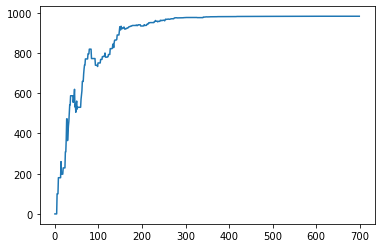

In [16]:
plt.plot(scores)
plt.show()